In [1]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm # progress bar
import random
import os
from sklearn.model_selection import train_test_split
import datetime
import glob
from sklearn.utils import shuffle

In [2]:
# import image processing libraries
import cv2
import skimage
from skimage.transform import resize
from IPython.display import Image

In [3]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import tensorflow_addons as tfa
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [4]:
# tensorboard path
path = r"C:\Users\tasos\Desktop\tensorboard\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)

In [5]:
# Load data
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29
train_len = 87000
train_dir = 'C:/Users/tasos/Desktop/deepml/input/asl_alphabet_train/asl_alphabet_train/'
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

C:\Users\tasos\anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


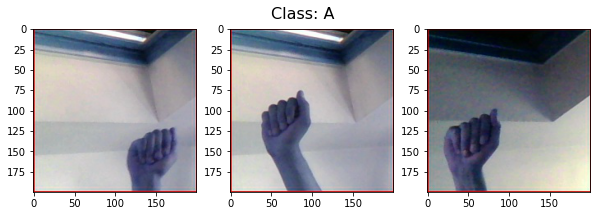

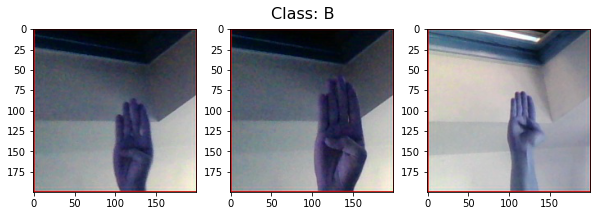

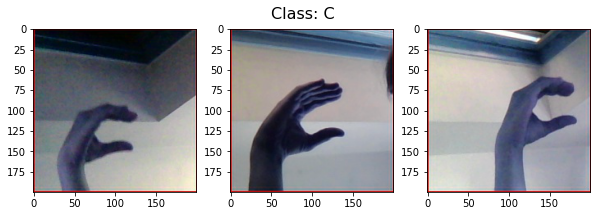

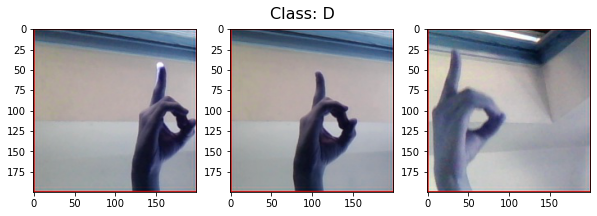

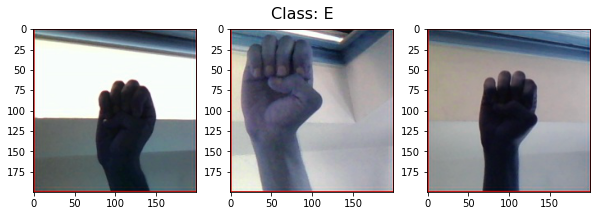

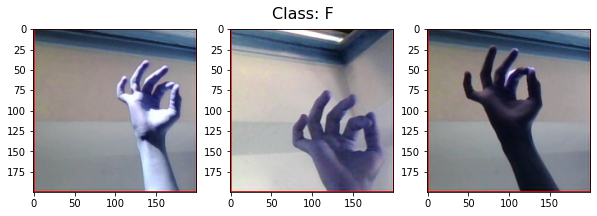

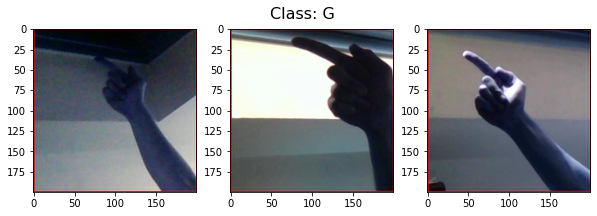

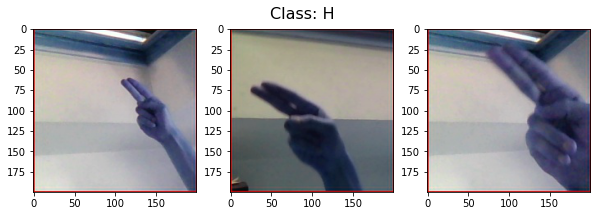

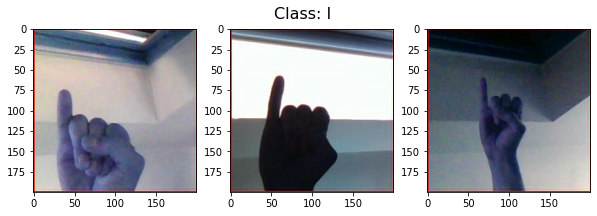

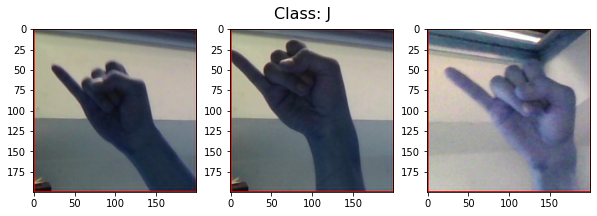

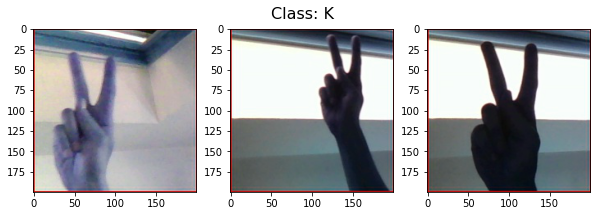

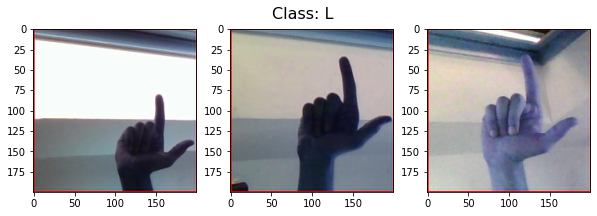

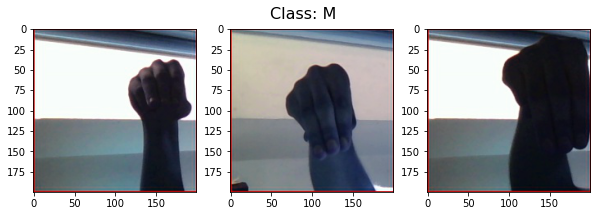

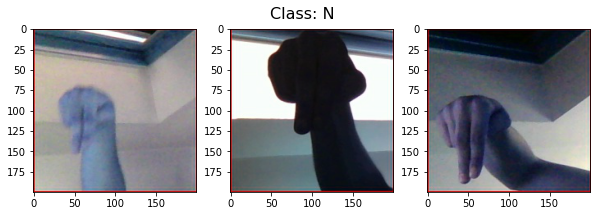

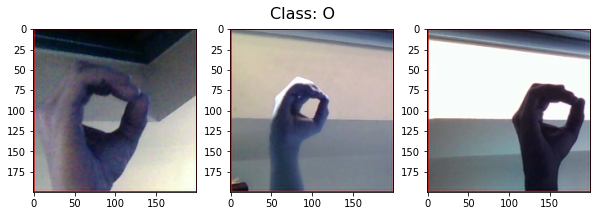

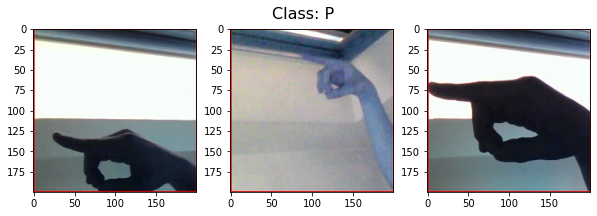

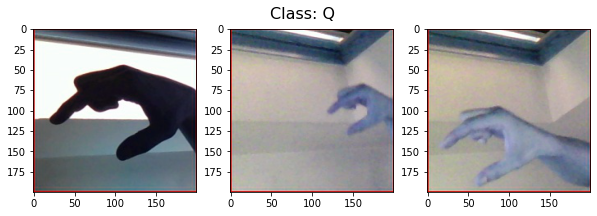

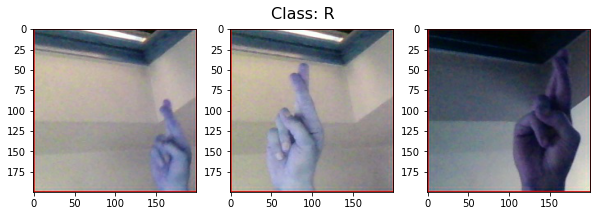

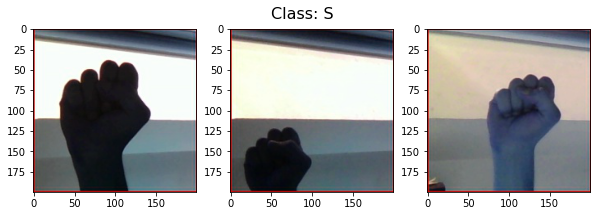

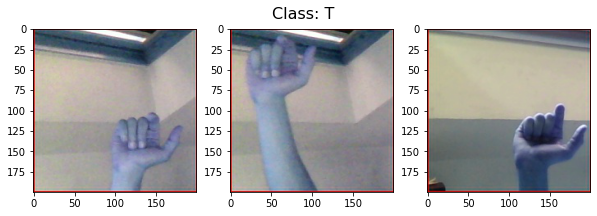

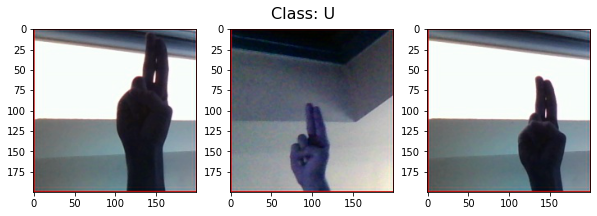

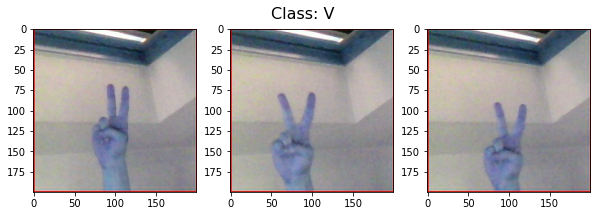

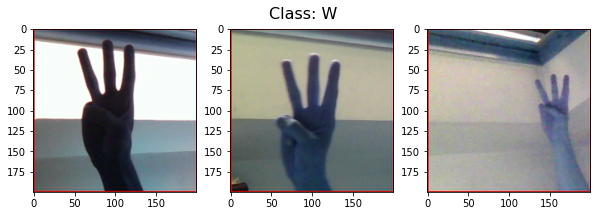

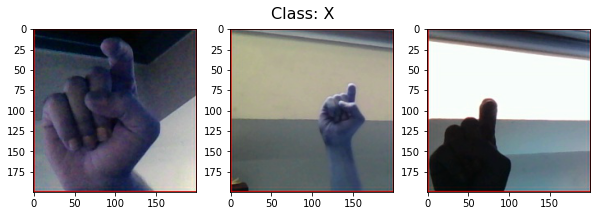

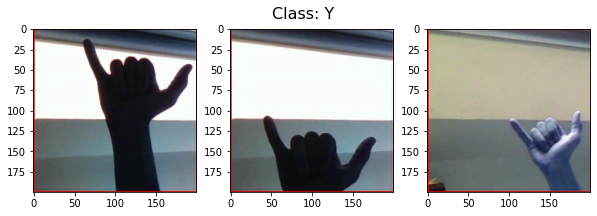

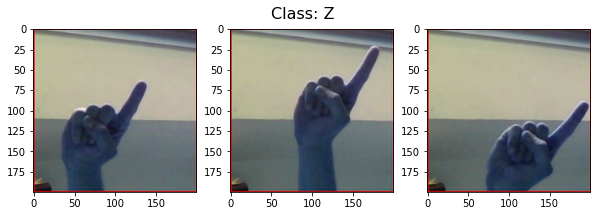

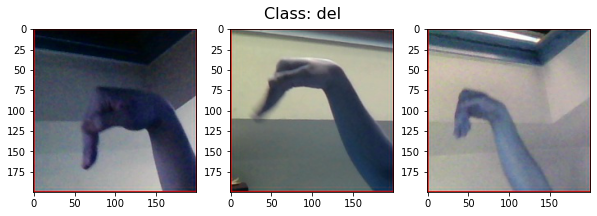

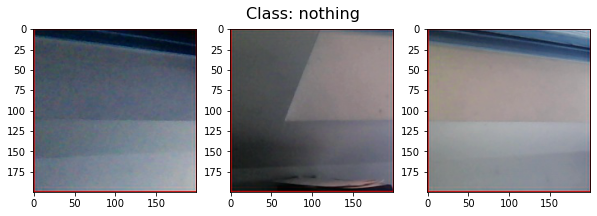

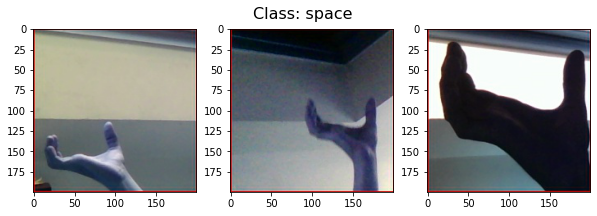

In [23]:
# Print 3 random images from each class
def plotThreeImages(images, path, className):
    r = random.sample(images, 3)
    plt.figure(figsize=(10,3))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2]))
    plt.suptitle('Class: {}'.format(className), fontsize=16)


for i in range(len(class_names)):    
    multipleImages = glob.glob(train_dir +'/{}/**.jpg'.format(class_names[i]))
    multiple_path = glob.glob(train_dir +'/{}/**.jpg'.format(class_names[i]))
    plotThreeImages(multipleImages, path, class_names[i])

In [7]:
################### GET X_TRAIN & Y_TRAIN ###################
def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            for i in range(num_classes):
                if folderName in class_names[i]:
                    label = i
                    print(folderName, class_names[i], i)
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y        

X_train, y_train = get_data(train_dir)

C:\Users\tasos\anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
  1%|          | 26/3000 [00:00<00:11, 258.92it/s]

A A 0


  1%|          | 28/3000 [00:00<00:10, 271.73it/s]

B B 1


  1%|          | 27/3000 [00:00<00:11, 264.66it/s]

C C 2


  1%|          | 26/3000 [00:00<00:11, 256.64it/s]

D D 3


  2%|▏         | 56/3000 [00:00<00:10, 272.45it/s]

del del 26


  2%|▏         | 55/3000 [00:00<00:10, 270.64it/s]

E E 4


  1%|          | 28/3000 [00:00<00:10, 270.39it/s]

F F 5


  2%|▏         | 56/3000 [00:00<00:10, 272.86it/s]

G G 6


  1%|          | 27/3000 [00:00<00:11, 264.39it/s]

H H 7


  2%|▏         | 55/3000 [00:00<00:10, 269.53it/s]

I I 8


  2%|▏         | 54/3000 [00:00<00:10, 268.55it/s]

J J 9


  1%|          | 28/3000 [00:00<00:10, 271.94it/s]

K K 10


  1%|          | 28/3000 [00:00<00:11, 269.36it/s]

L L 11


  1%|          | 27/3000 [00:00<00:11, 269.73it/s]

M M 12


  2%|▏         | 55/3000 [00:00<00:10, 272.15it/s]

N N 13


  1%|          | 26/3000 [00:00<00:11, 259.94it/s]

nothing nothing 27


  2%|▏         | 54/3000 [00:00<00:11, 267.16it/s]

O O 14


  2%|▏         | 56/3000 [00:00<00:10, 271.46it/s]

P P 15


  1%|          | 27/3000 [00:00<00:11, 261.70it/s]

Q Q 16


  1%|          | 28/3000 [00:00<00:11, 269.10it/s]

R R 17


  2%|▏         | 54/3000 [00:00<00:11, 267.36it/s]

S S 18


  1%|          | 28/3000 [00:00<00:10, 279.68it/s]

space space 28


  2%|▏         | 54/3000 [00:00<00:10, 269.94it/s]

T T 19


  1%|          | 29/3000 [00:00<00:10, 279.98it/s]

U U 20


  2%|▏         | 56/3000 [00:00<00:10, 268.75it/s]

V V 21


  1%|          | 28/3000 [00:00<00:10, 271.39it/s]

W W 22


  2%|▏         | 56/3000 [00:00<00:10, 277.74it/s]

X X 23


  1%|          | 26/3000 [00:00<00:11, 254.83it/s]

Y Y 24


  1%|          | 29/3000 [00:00<00:10, 283.56it/s]

Z Z 25


100%|██████████| 3000/3000 [00:10<00:00, 277.39it/s]


In [8]:
print(X_train.shape)
print(y_train.shape)

(87000, 64, 64, 3)
(87000,)


In [9]:
#image shape
for i in range(0, train_len, 3000):
    print("The shape of one image is : ", X_train[i].shape)

The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one

In [10]:
#Split the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [11]:
# One-Hot-Encode the categorical data
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [12]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(69600, 64, 64, 3)
(69600,)
(17400, 64, 64, 3)
(17400,)
(69600, 29)
(17400, 29)


In [13]:
#Shuffle data
X_train, y_cat_train = shuffle(X_train, y_cat_train, random_state=13)
X_test, y_cat_test = shuffle(X_test, y_cat_test, random_state=13)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}


C:\Users\tasos\anaconda3\envs\deep\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


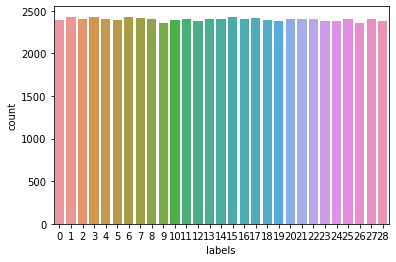

In [14]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H',
                  8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O',
                  15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V',
                  22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}

dict_characters=map_characters
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

C:\Users\tasos\anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


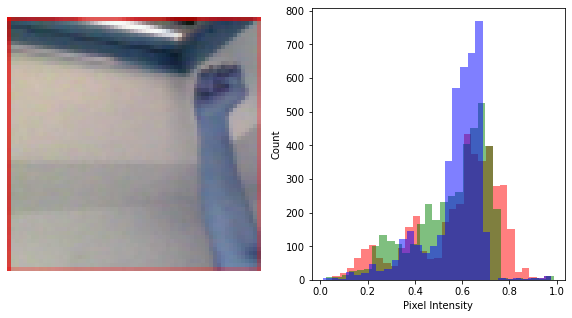

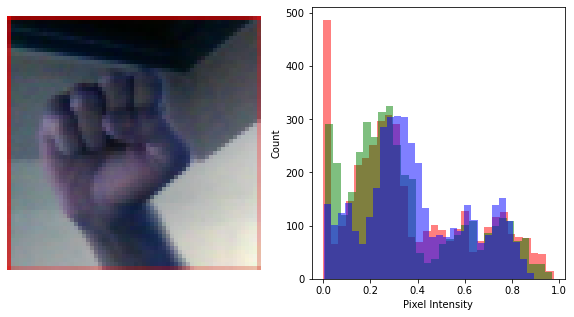

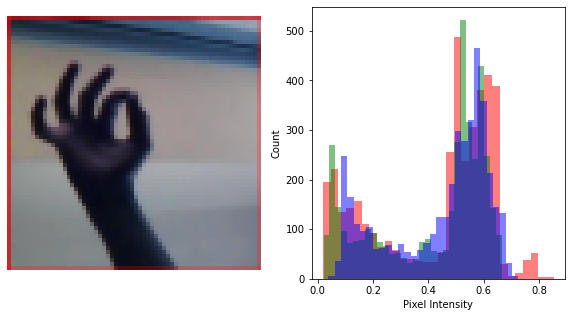

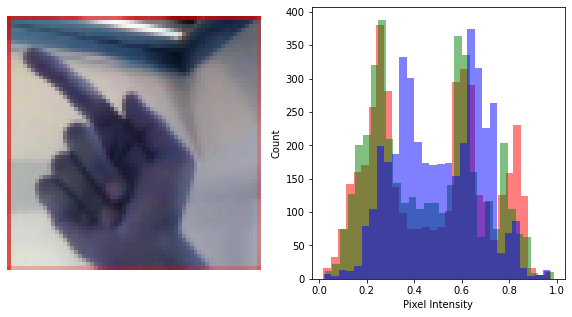

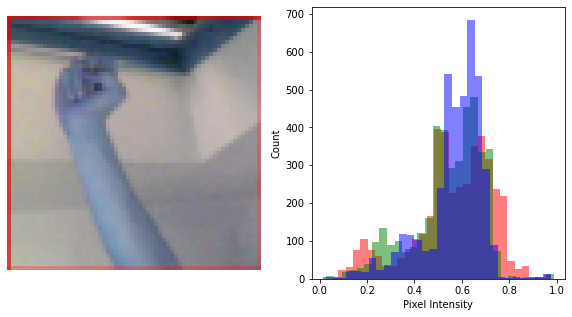

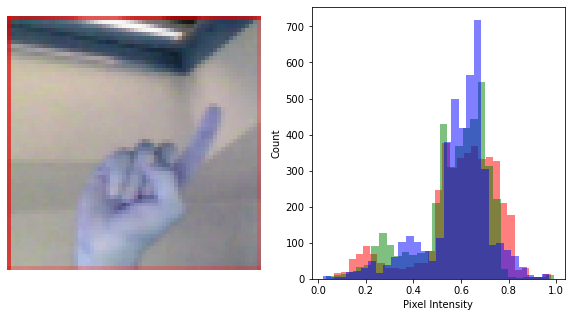

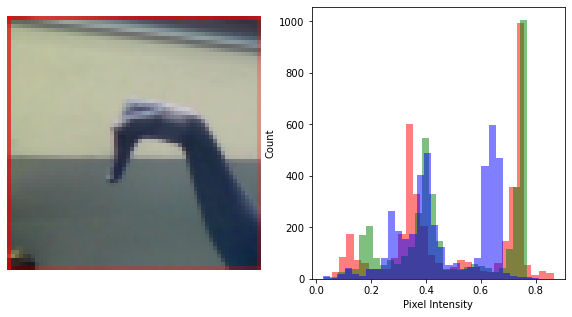

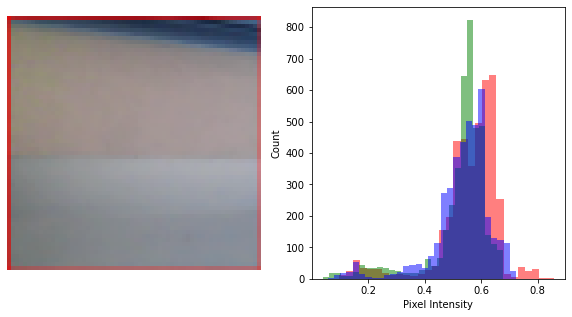

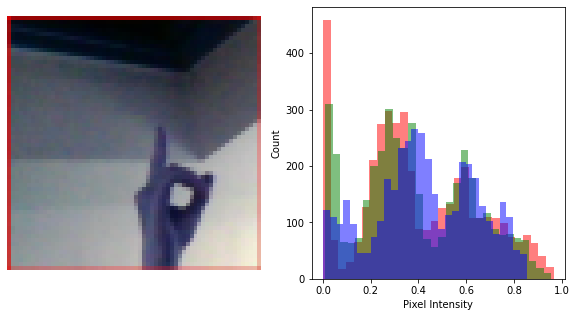

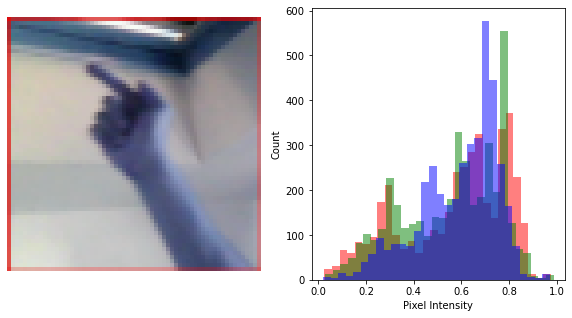

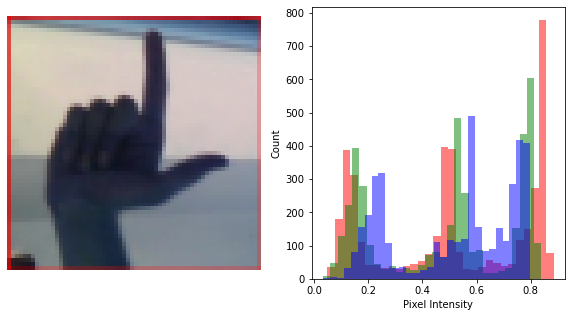

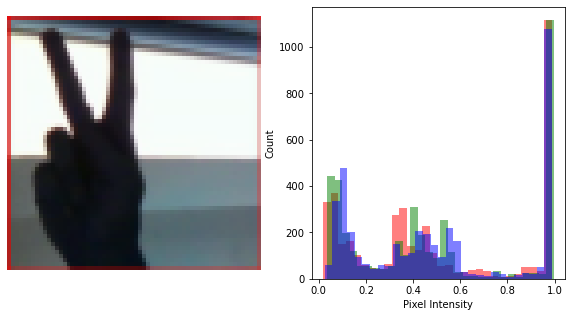

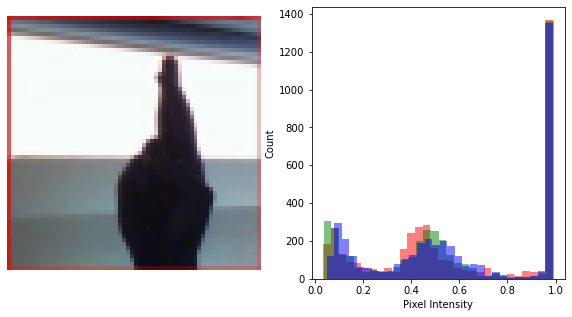

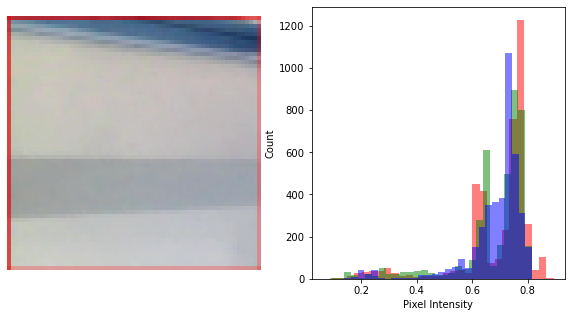

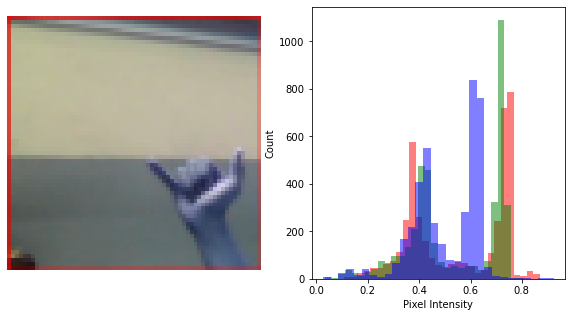

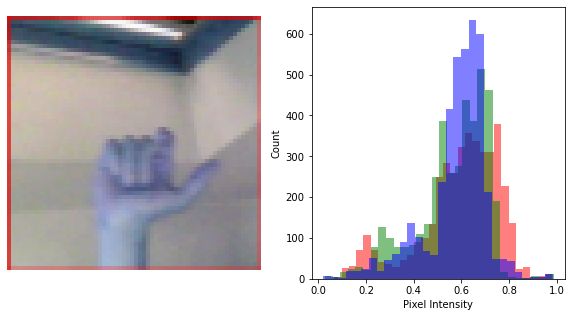

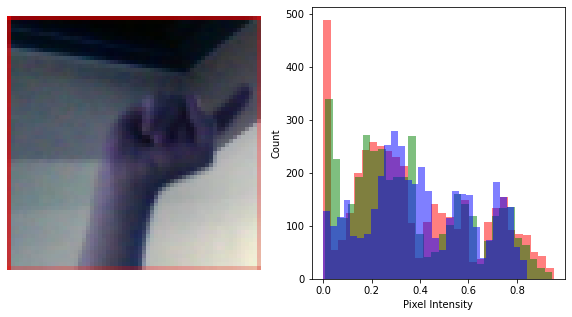

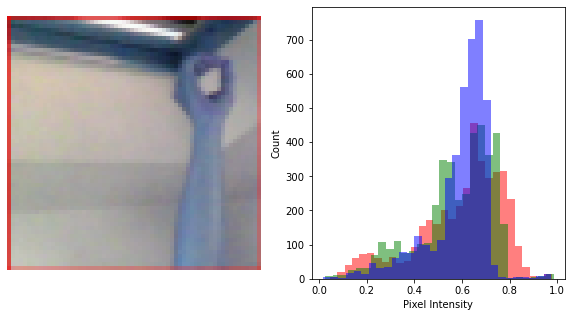

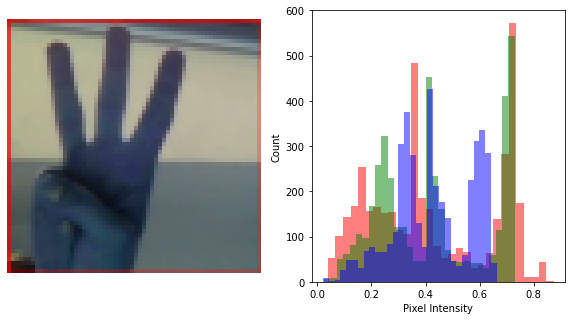

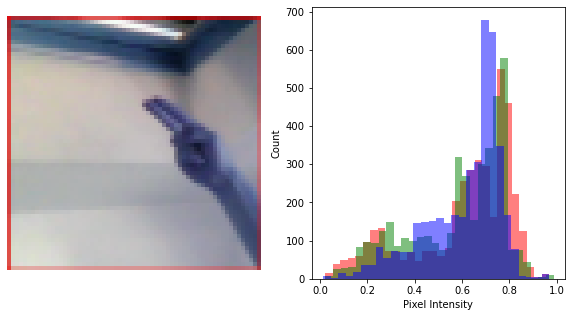

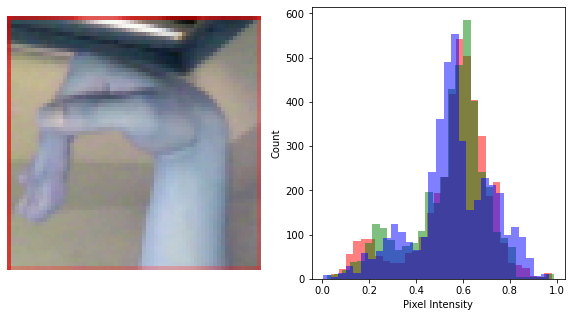

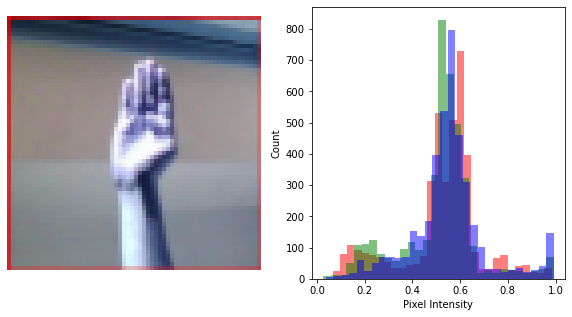

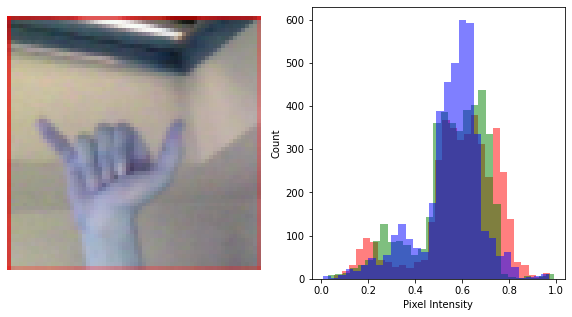

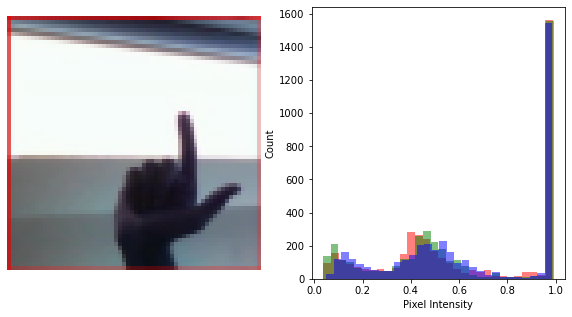

In [15]:
'''
    Plot histogram of RGB Pixel Intensities
'''
def plotHistogram(a):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(X_train[a])
    # plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(X_train[a][:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(X_train[a][:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(X_train[a][:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
    # plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    # plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    # plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
    # plt.title("Label: {0}".format(df["labels"][a]))#y_train[a]))

for i in range(0, 69600, 3000):
    plotHistogram(i)

In [17]:
'''Early Stopping is done to make sure the model fitting stops at the most 
optimized accuracy point. After the early stopping point, 
the model might start overfitting. For testing purposes, this step can be skipped 
and complete training can be done.
'''

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [21]:
input_shape = (64,64,3)

model = tf.keras.models.Sequential([
        
        tf.keras.layers.Conv2D(filters = 32,
                                kernel_size = 3, 
                                activation='relu',
                                input_shape=input_shape),
    
        
    
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
    
        tf.keras.layers.Conv2D(filters= 64,
                                kernel_size = 3,
                                activation='relu'),
    
        
    
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
        
        tf.keras.layers.Conv2D(filters= 128,
                                kernel_size = 3,
                                activation='relu'),
            
    
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),       
    
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dropout(0.25),

    
        tf.keras.layers.Dense(29,activation='softmax')
        ])
 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',f1])

model_fit = model.fit(X_train, y_cat_train, epochs=20, batch_size=64,
                        verbose=1, validation_data=(X_test, y_cat_test),
                        callbacks=[early_stop,tensorboard_callback])

Train on 69600 samples, validate on 17400 samples
Epoch 1/20
69600/69600 [==============================] - 131s 2ms/sample - loss: 0.9567 - accuracy: 0.7163 - f1_score: 0.7280 - val_loss: 0.2135 - val_accuracy: 0.9336 - val_f1_score: 0.9327
Epoch 2/20
69600/69600 [==============================] - 127s 2ms/sample - loss: 0.1709 - accuracy: 0.9453 - f1_score: 0.9441 - val_loss: 0.0941 - val_accuracy: 0.9723 - val_f1_score: 0.9714
Epoch 3/20
69600/69600 [==============================] - 128s 2ms/sample - loss: 0.0863 - accuracy: 0.9730 - f1_score: 0.9729 - val_loss: 0.0511 - val_accuracy: 0.9837 - val_f1_score: 0.9842
Epoch 4/20
69600/69600 [==============================] - 124s 2ms/sample - loss: 0.0590 - accuracy: 0.9810 - f1_score: 0.9810 - val_loss: 0.0288 - val_accuracy: 0.9914 - val_f1_score: 0.9912
Epoch 5/20
69600/69600 [==============================] - 127s 2ms/sample - loss: 0.0454 - accuracy: 0.9859 - f1_score: 0.9859 - val_loss: 0.0313 - val_accuracy: 0.9904 - val_f1_scor

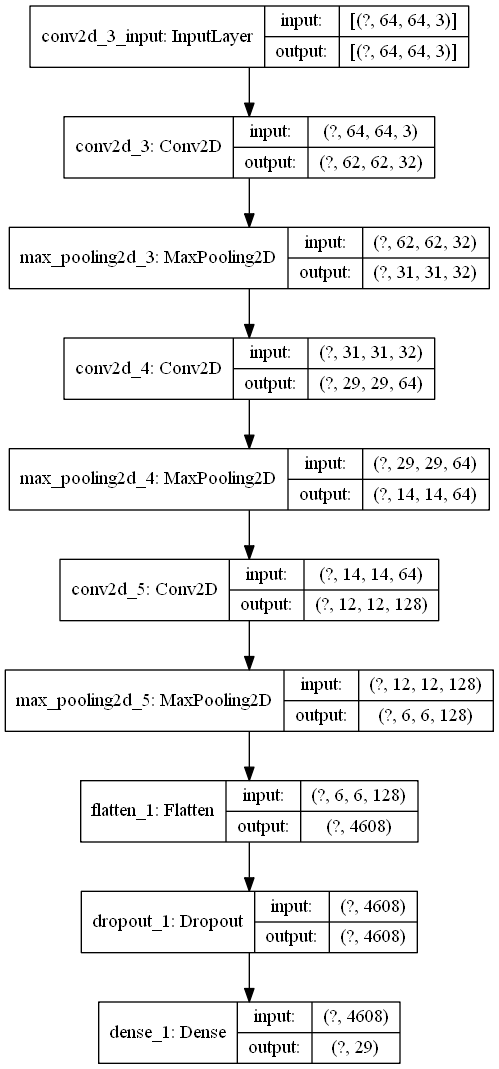

In [22]:
plot_model(model, to_file='plot_model.png', show_shapes=True)
Image(filename='plot_model.png')